Typy danych w zbiorze:
ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object

Wyniki dla Drzewa Decyzyjnego:
Dokładność (Accuracy): 0.7029411764705882
              precision    recall  f1-score   support

           0       0.56      0.65      0.60       116
           1       0.80      0.73      0.76       224

    accuracy                           0.70       340
   macro avg       0.68      0.69      0.68       340
weighted avg       0.72      0.70      0.71       340


Wyniki dla Random Forest:
Dokładność (Accuracy): 0.75
              precision    recall  f1-score   support

           0       0.77      0.38      0.51       116
           1       0.75      0.94      0.83       224

    accuracy                           0.75       340
   macro avg       0.76      0.66      0.67  

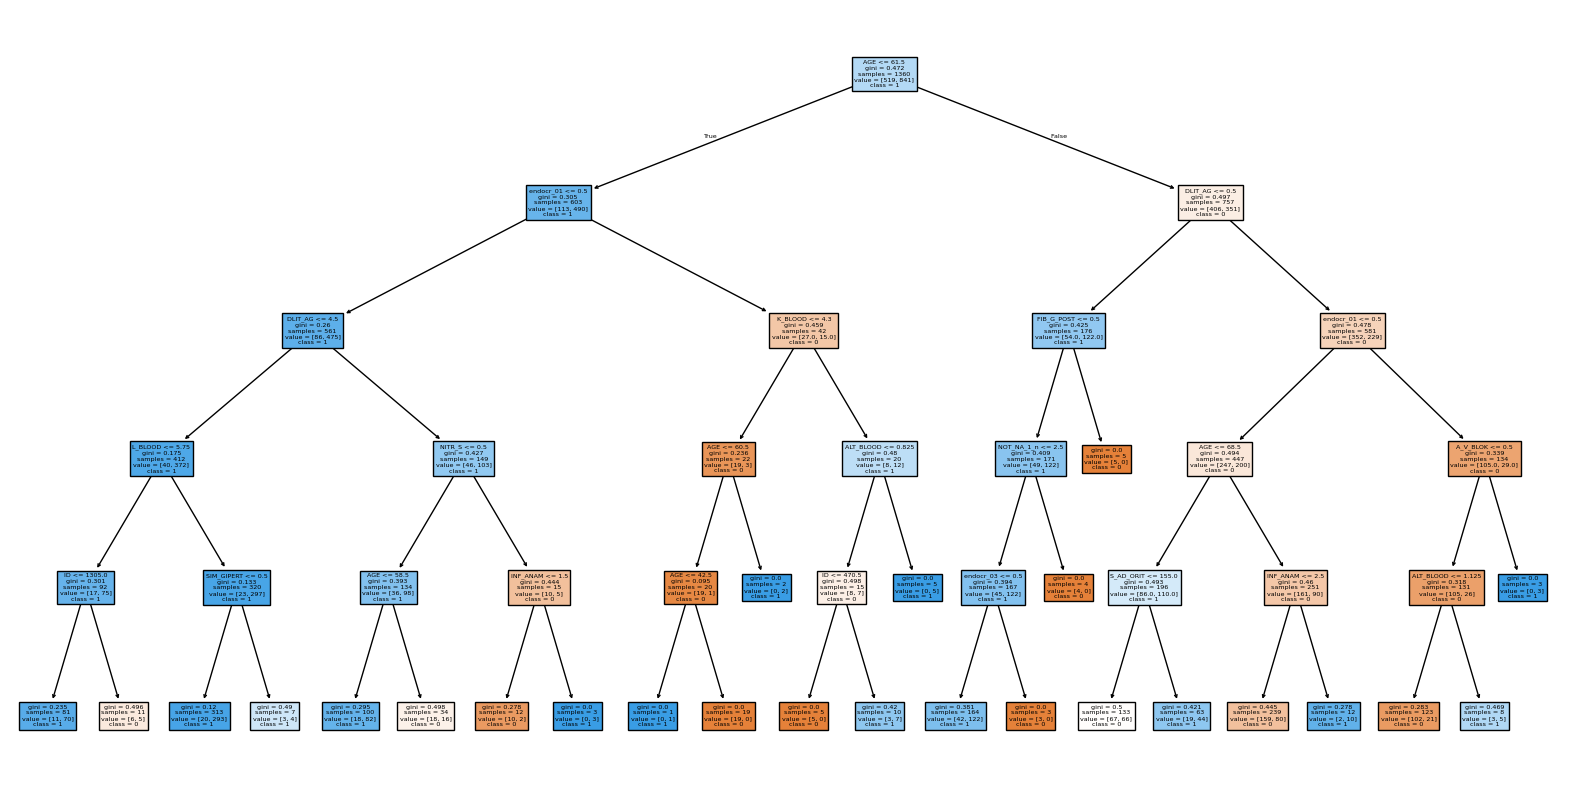

In [3]:
# Importowanie niezbędnych bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Wczytanie danych
data = pd.read_csv('Myocardial_infarction_complications_Database.csv')

# 2. Preprocessing
print("Typy danych w zbiorze:")
print(data.dtypes)

X = data.drop('SEX', axis=1)  # Cechy (features)
y = data['SEX']               # Etykiety (target)

# 3. Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Trenowanie modeli

# a) Drzewo decyzyjne
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# b) Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# c) Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Predykcja

# a) Drzewo decyzyjne
y_pred_dt = dt_model.predict(X_test)

# b) Random Forest
y_pred_rf = rf_model.predict(X_test)

# c) Gradient Boosting
y_pred_xgb = xgb_model.predict(X_test)

# 6. Ewaluacja modeli

# a) Drzewo decyzyjne
print("\nWyniki dla Drzewa Decyzyjnego:")
print("Dokładność (Accuracy):", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# b) Random Forest
print("\nWyniki dla Random Forest:")
print("Dokładność (Accuracy):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# c) Gradient Boosting
print("\nWyniki dla XGBoost:")
print("Dokładność (Accuracy):", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()